In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import numpy as np

In [2]:
import os
os.chdir("../../")
print(os.getcwd())
#train_path = "./ver2/Training"
#test_path = "./ver2/Testing"
train_path = "./datasets/ver1/michi_Training"
test_path = "./datasets/ver1/michi_Testing"


c:\Users\2020A00138\Desktop\datascience


In [3]:
train_files = glob(train_path + '/*/*.jp*g')
test_files = glob(test_path + '/*/*.jp*g')

In [4]:
"""
ImageDataGenerator를 쓸땐 image를 sub directory에 넣아야한다.
이때 sub directory의 path는 지정하면 안된다.
"""
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_path,
                                       target_size=(100,100),
                                       #batch_size = 32,
                                       shuffle = True,
                                       save_format='jpg')
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_path,
                                      target_size=(100,100),
                                      #batch_size = 32,
                                      shuffle = True,
                                      save_format='jpg')

Found 7384 images belonging to 5 classes.
Found 1848 images belonging to 5 classes.


In [5]:
from tensorflow.keras.applications.vgg16 import  VGG16
model = VGG16(weights = 'imagenet', include_top = True)

In [6]:
model = Sequential()
model.add(Conv2D(input_shape=(100,100,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [7]:
model.add(Flatten())
model.add(Dense(units=2048,activation="relu"))
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=5, activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 256)       2

In [9]:
from keras.optimizers import Adam,SGD
opt = Adam(lr=0.001)
sgd = SGD(lr=1e-4, momentum=0.9)
model.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint( "vgg16_1.h5",
                               monitor = 'val_accuracy',
                               verbose = 1,
                               save_best_only = True,
                               save_weights_only = False,
                               mode = 'auto')
                               #save_freq = 1)
early = EarlyStopping(monitor = 'val_accuracy',
                       min_delta = 0,
                       patience = 20,
                       verbose = 1,
                       mode = 'auto')

hist = model.fit_generator(steps_per_epoch = (len(train_files)/32),
                            generator = traindata,
                            validation_data = testdata,
                            validation_steps = (len(test_files)/32),
                            epochs = 5,
                            callbacks = [checkpoint,early])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
231/230 [==============================] - ETA: 0s - loss: 1.3011 - accuracy: 0.4670
Epoch 00001: val_accuracy improved from -inf to 0.57792, saving model to vgg16_1.h5
231/230 [==============================] - 946s 4s/step - loss: 1.3011 - accuracy: 0.4670 - val_loss: 1.0666 - val_accuracy: 0.5779
Epoch 2/5
231/230 [==============================] - ETA: 0s - loss: 0.8240 - accuracy: 0.6656
Epoch 00002: val_accuracy improved from 0.57792 to 0.75487, saving model to vgg16_1.h5
231/230 [==============================] - 942s 4s/step - loss: 0.8240 - accuracy: 0.6656 - val_loss: 0.6839 - val_accuracy: 0.7549
Epoch 3/5
231/230 [==============================] - ETA: 0s - loss: 0.6694 - accuracy: 0.7415
Epoch 00003: val_accuracy improved from 0.75487 to 0.79924, saving model to vgg16_1.h5
231/230 [==============================] - 941s 4s/step - loss: 0.6694 - accuracy: 0.7415 - val_loss: 0.5604 - val_ac

accuracy
[0.4669555723667145, 0.6656283736228943, 0.7414680123329163, 0.7804712653160095, 0.8113488554954529]
val_accuracy
[0.5779221057891846, 0.7548701167106628, 0.7992424368858337, 0.7943723201751709, 0.8181818127632141]


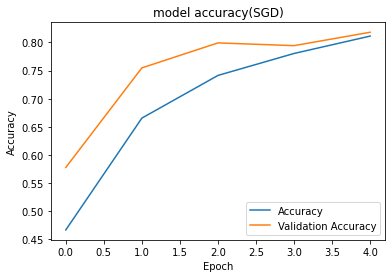

In [11]:
import matplotlib.pyplot as plt
print("accuracy")
print(hist.history["accuracy"])
print("val_accuracy")
print(hist.history["val_accuracy"])

plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy(SGD)")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

loss
[1.3010585308074951, 0.8240405321121216, 0.669390082359314, 0.5876257419586182, 0.4949920177459717]
val_loss
[1.0665740966796875, 0.6839103102684021, 0.5604456663131714, 0.5627881288528442, 0.4771304726600647]


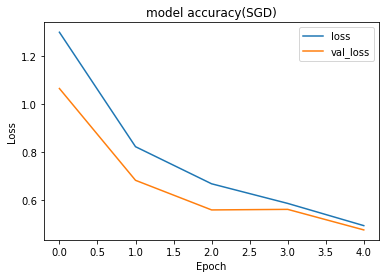

In [12]:
print("loss")
print(hist.history["loss"])
print("val_loss")
print(hist.history["val_loss"])

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy(SGD)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","val_loss"])
plt.show()

In [13]:
tedata = ImageDataGenerator()
testdata = tedata.flow_from_directory(directory = test_path,
                                      target_size = (100,100))

Found 1848 images belonging to 5 classes.


In [14]:
# evaluate() : モデルの妥当性・性能を確認する
# (loss, accuracy)
print(model.evaluate(testdata, verbose = 0))

# decode_predictions(prediction,top =)
# decode_predictions는 (num_samples,1000)를 만족하지 않으면 쓸 수 없다.

[0.4771305024623871, 0.8181818127632141]


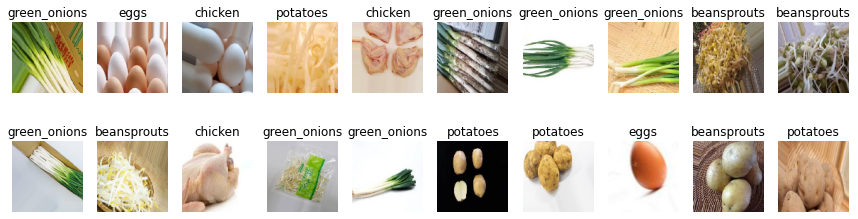

In [22]:
import random
import matplotlib.pyplot as plt
from keras.preprocessing import image

pre_test = [random.randint(0,len(test_files)) for i in range(20)]
imgshow = []
title = []
j = 0
for i in pre_test:
    img = image.load_img(test_files[i],target_size = (100,100))
    img = np.asarray(img)
    img = np.expand_dims(img, axis = 0)
    
    output = model.predict(img)
    if output[0][0] > output[0][1] and output[0][0] > output[0][2] and output[0][0] > output[0][3] and output[0][0] > output[0][4] :
        title.append("beansprouts")
    elif output[0][1] > output[0][0] and output[0][1] > output[0][2] and output[0][1] > output[0][3] and output[0][1] > output[0][4] :
        title.append("chicken")
    elif output[0][2] > output[0][0] and output[0][2] > output[0][1] and output[0][2] > output[0][3] and output[0][2] > output[0][4] :
        title.append("eggs")
    elif output[0][3] > output[0][0] and output[0][3] > output[0][1] and output[0][3] > output[0][2] and output[0][3] > output[0][4] :
        title.append("green_onions")
    else:
        title.append("potatoes")
   
    img = np.squeeze(img, axis = 0)
    imgshow.append(img)

plt.figure(figsize = (15,4))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(imgshow[i])
    plt.title(title[i])
    plt.axis("off")